# **RANDOM FOREST CLASSIFIER**

In [2]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(40)
print('\n\t ### Training Random Forest Classifier ### \n')
rf = RandomForestClassifier(max_features=None,class_weight='balanced', random_state= 40)
rf_parameters = {
            'criterion':('entropy','gini'),
            'n_estimators':(30,50,100),
            'max_depth':(10,20,30,50,100,200),
            }


	 ### Training Random Forest Classifier ### 



#  **Random UnderSampling and OverSampling**   ###

In [3]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import pandas as pd

X = pd.read_csv('training_data.csv')
y = pd.read_csv('train_data_classlabels.csv')
counts_0 = {0: 40000, 1 : 142} 
counts_1= {0: 40000, 1: 3500}

pipeline = Pipeline([
    ('under_sampling', RandomUnderSampler(sampling_strategy=counts_0, random_state=40)),
    ('over_sampling', RandomOverSampler(sampling_strategy=counts_1, random_state=40))
])

X_random_selected, y_random_selected = pipeline.fit_resample(X, y)

# train_test_split

from sklearn.model_selection import train_test_split
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_random_selected, y_random_selected, test_size = 0.4, random_state = 40)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(rf, rf_parameters, scoring='f1_macro', cv = 10 )

# fitting the model for grid search
grid.fit(X_train_rs, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_rs)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 50}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16003
         1.0       0.99      1.00      1.00      1397

    accuracy                           1.00     17400
   macro avg       1.00      1.00      1.00     17400
weighted avg       1.00      1.00      1.00     17400



# Feature selection ###

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.24974955 0.25423044 0.25769693 0.2601009  0.26428704 0.25676883
 0.25626762 0.26103921 0.25425685 0.26360023 0.26888266 0.26877394
 0.27095616 0.24906749 0.27132433 0.24976756 0.26732259 0.27245274
 0.26511749 0.25576793 0.25040564 0.25431349 0.25033172 0.24988304
 0.24917854 0.25108502 0.2503933  0.25442601 0.25183202 0.1937974 ]



<Axes: >

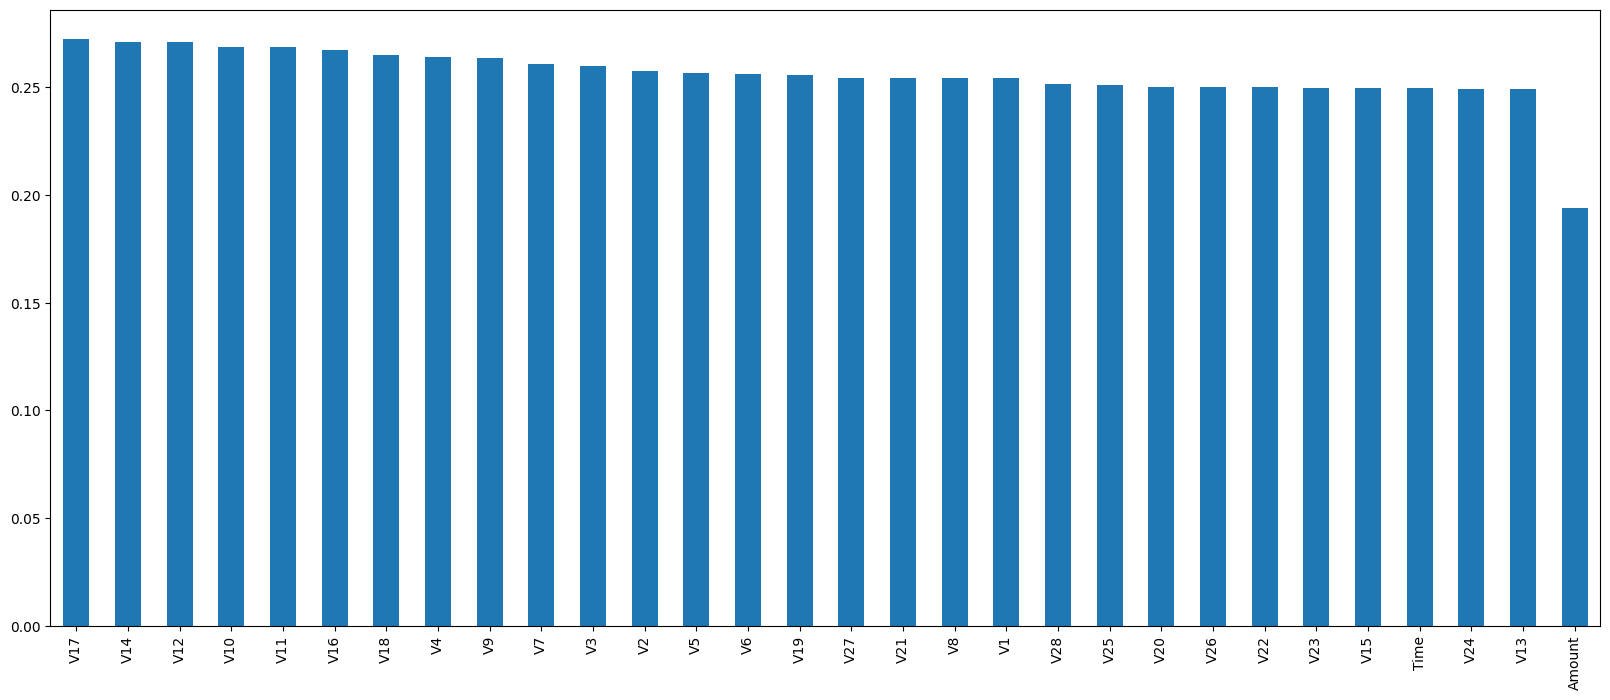

In [5]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_rs = mutual_info_classif(X_train_rs, y_train_rs)
print(m_rs)
print()

m_rs = pd.Series(m_rs)

m_rs.index = X_train_rs.columns
m_rs.sort_values(ascending= False)
m_rs.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting KBest

In [6]:
from sklearn.feature_selection import SelectKBest
k_best = 29
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_rs = mi_selector.fit_transform(X_train_rs, y_train_rs)
X_test_selected_rs = mi_selector.transform(X_test_rs)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(rf, rf_parameters, scoring='f1_macro', cv =10)

# fitting the model for grid search
grid.fit(X_train_selected_rs, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_rs)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 50}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16003
         1.0       0.99      1.00      1.00      1397

    accuracy                           1.00     17400
   macro avg       1.00      1.00      1.00     17400
weighted avg       1.00      1.00      1.00     17400



# Feature Selection for Random Forest


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<Axes: >

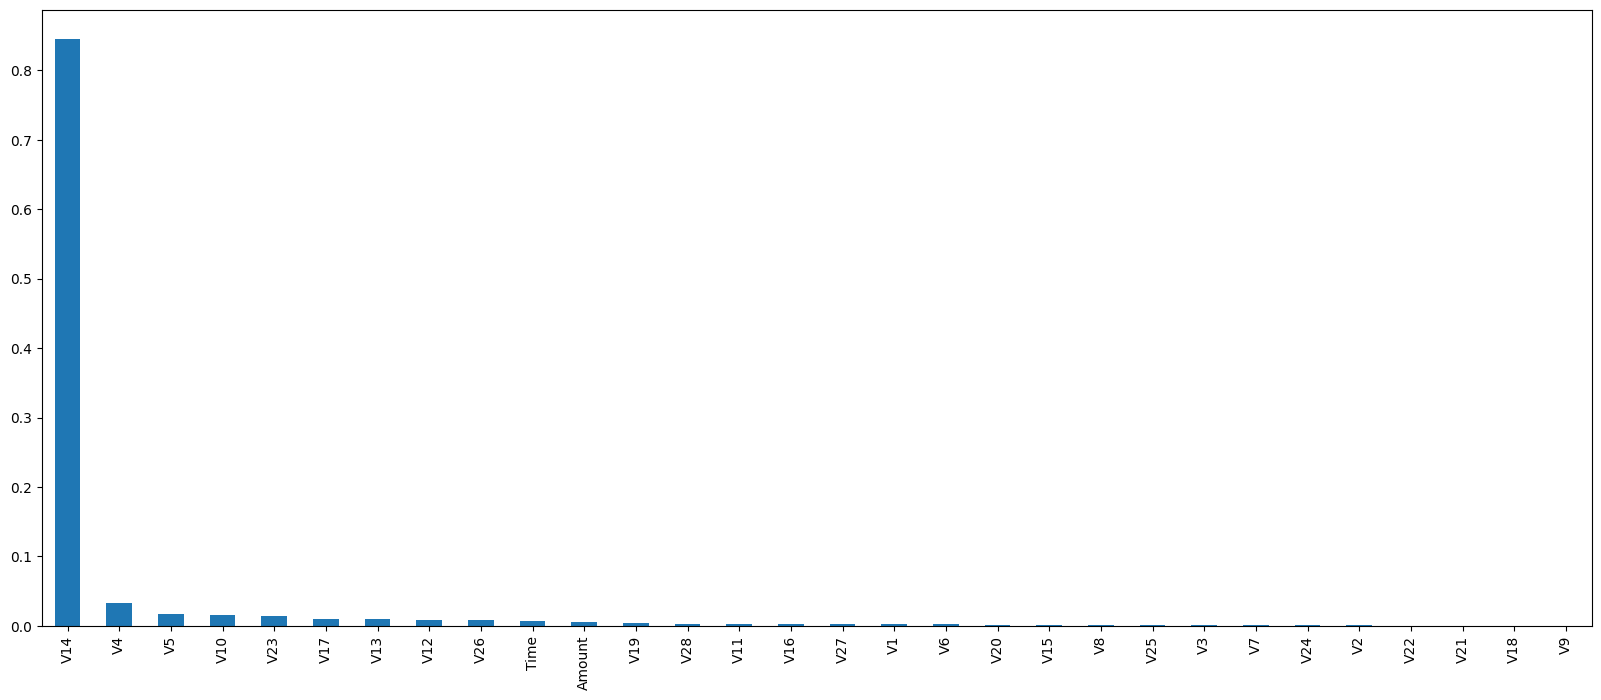

In [8]:
rf.fit(X_train_rs, y_train_rs)
f_rs = pd.Series(rf.feature_importances_, index = X_train_rs.columns)
f_rs.sort_values(ascending =False).plot.bar(figsize=(20,8))

#  Selecting KBest for Random Forest

In [9]:
k = 10
top_k_features = f_rs.nlargest(k).index

print(top_k_features)

X_train_selected_rs_1 = X_train_rs[top_k_features]
X_test_selected_rs_1 = X_test_rs[top_k_features]


Index(['V14', 'V4', 'V5', 'V10', 'V23', 'V17', 'V13', 'V12', 'V26', 'Time'], dtype='object')


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(rf, rf_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_rs_1, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_rs_1)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16003
         1.0       0.99      1.00      1.00      1397

    accuracy                           1.00     17400
   macro avg       1.00      1.00      1.00     17400
weighted avg       1.00      1.00      1.00     17400



# **SMOTETomek** 

In [11]:
from imblearn.combine import SMOTETomek
smto = SMOTETomek()
X_smto, y_smto = smto.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train_smto, X_test_smto, y_train_smto, y_test_smto = train_test_split(X_smto, y_smto, test_size = 0.2, random_state = 40)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(rf, rf_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_smto, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_smto)

# print classification report
print(classification_report(y_test_smto, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 30}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11418
         1.0       1.00      1.00      1.00     11327

    accuracy                           1.00     22745
   macro avg       1.00      1.00      1.00     22745
weighted avg       1.00      1.00      1.00     22745



# Feature selection ###

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.30640509 0.30261969 0.42316328 0.49681426 0.51818706 0.25748908
 0.3729863  0.40378025 0.24232563 0.35917094 0.53223933 0.50046683
 0.52369341 0.04952847 0.58060267 0.05547219 0.42354642 0.48580595
 0.29727859 0.14130695 0.17175211 0.33855374 0.03732739 0.10667471
 0.10191759 0.09215513 0.17317755 0.31481645 0.27269622 0.30853433]



<Axes: >

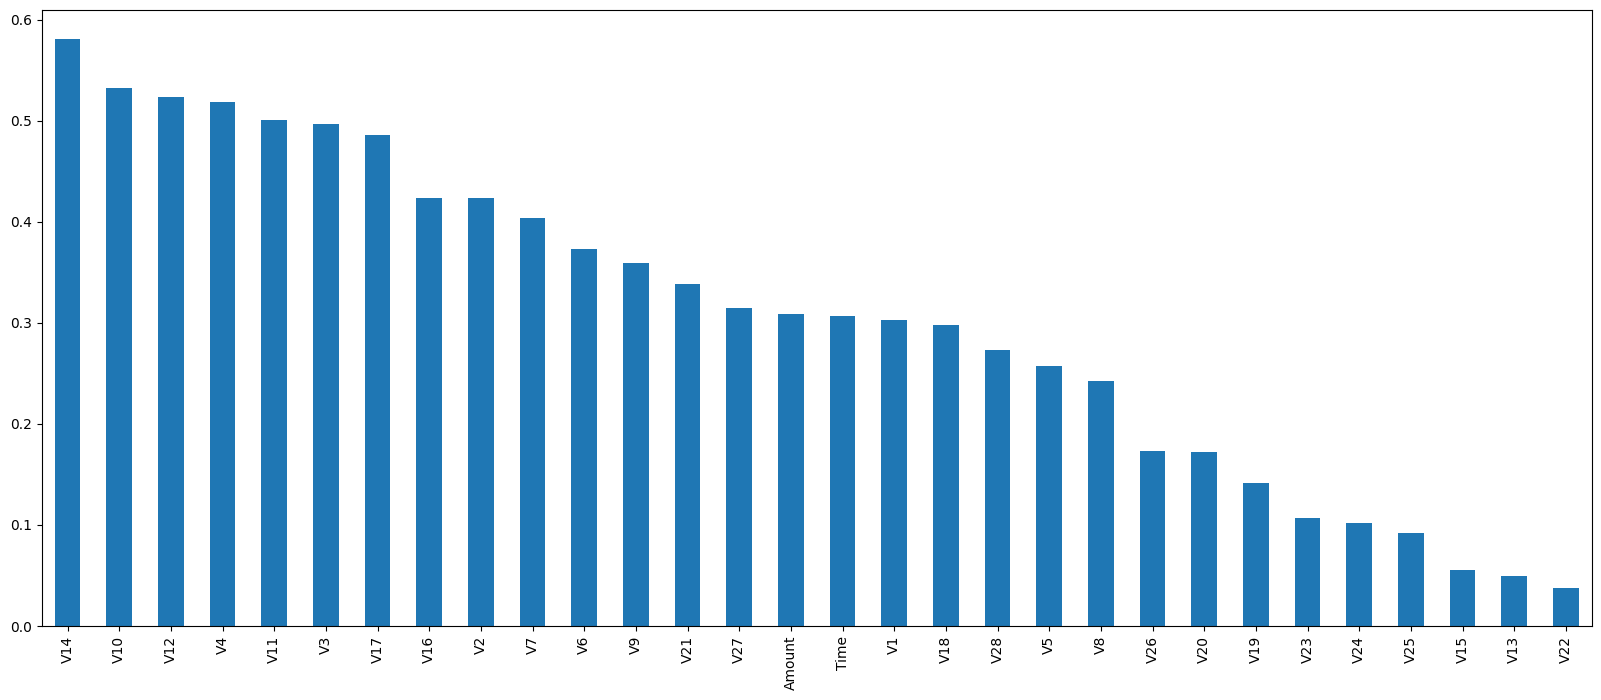

In [13]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_smto = mutual_info_classif(X_train_smto, y_train_smto)
print(m_smto)
print()

m_smto = pd.Series(m_smto)

m_smto.index = X_train_smto.columns
m_smto.sort_values(ascending= False)
m_smto.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting KBest

In [14]:
from sklearn.feature_selection import SelectKBest
k_best = 27
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_smto = mi_selector.fit_transform(X_train_smto, y_train_smto)
X_test_selected_smto = mi_selector.transform(X_test_smto)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(rf, rf_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smto, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smto)

# print classification report
print(classification_report(y_test_smto, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

KeyboardInterrupt: 

# Feature Selection for Random Forest

In [ ]:
rf.fit(X_train_smto, y_train_smto)
f_smto = pd.Series(rf.feature_importances_, index = X_train_smto.columns)
f_smto.sort_values(ascending =False).plot.bar(figsize=(20,8))

# Selecting KBest for Random Forest

In [ ]:
k = 10
top_k_features = f_smto.nlargest(k).index

print(top_k_features)

X_train_selected_smto_1 = X_train_smto[top_k_features]
X_test_selected_smto_1 = X_test_smto[top_k_features]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(rf, rf_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smto_1, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smto_1)

# print classification report
print(classification_report(y_test_smto, grid_predictions))

# **SMOTE + TOMEKLinks**

In [ ]:
from imblearn.over_sampling import SMOTE
desired_counts = {0:57000, 1: 5600}
smot = SMOTE(sampling_strategy=desired_counts, random_state=40)
X_smot, y_smot =smot.fit_resample(X, y)

from imblearn.under_sampling import TomekLinks

tomek_links = TomekLinks()
X_smotu, y_smotu = tomek_links.fit_resample(X_smot, y_smot)

from sklearn.model_selection import train_test_split
X_train_smotu, X_test_smotu, y_train_smotu, y_test_smotu = train_test_split(X_smotu, y_smotu, test_size = 0.2, random_state = 40)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(rf, rf_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_smotu, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_smotu)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

# Feature Selection

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_smotu = mutual_info_classif(X_train_smotu, y_train_smotu)
print(m_smotu)
print()

m_smotu = pd.Series(m_smotu)

m_smotu.index = X_train_smotu.columns
m_smotu.sort_values(ascending= False)
m_smotu.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting Kbest

In [ ]:
from sklearn.feature_selection import SelectKBest
k_best = 27
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_smotu = mi_selector.fit_transform(X_train_smotu, y_train_smotu)
X_test_selected_smotu = mi_selector.transform(X_test_smotu)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(rf, rf_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smotu, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smotu)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

# Feature Selection for Random Forest

In [ ]:
rf.fit(X_train_smotu, y_train_smotu)
f_smotu = pd.Series(rf.feature_importances_, index = X_train_smotu.columns)
f_smotu.sort_values(ascending =False).plot.bar(figsize=(20,8))

# Selecting KBest for Random Forest

In [ ]:
k = 10
top_k_features = f_smotu.nlargest(k).index

print(top_k_features)

X_train_selected_smotu_1 = X_train_smotu[top_k_features]
X_test_selected_smotu_1 = X_test_smotu[top_k_features]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(rf, rf_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smotu_1, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smotu_1)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))